In [15]:
# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pengaturan visualisasi
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [16]:
# 2. Load dataset
file_path = "all_summary.csv"  # Sesuaikan jika filenya berada di lokasi lain
df = pd.read_csv(file_path)

# Tampilkan 5 baris pertama
df.head()

,algorithm,load,server,run,latency_ms,latency_concurrent_ms,requests_per_second,transfer_rate_kbps,concurrency_level,complete_requests,failed_requests,time_taken,document_length,total_transferred,html_transferred
0,lc,Rendah,server1,run1,14.719,0.294,3396.90,1698.45,50,1000,0,0.294,268,512000,268000
1,lc,Rendah,server1,run2,14.518,0.290,3443.92,1762.32,50,1000,0,0.290,280,524000,280000
2,lc,Rendah,server1,run3,14.041,0.281,3560.97,1863.95,50,1000,0,0.281,292,536000,292000
3,lc,Rendah,server2,run1,16.063,0.321,3112.69,1556.34,50,1000,0,0.321,268,512000,268000
4,lc,Rendah,server2,run2,14.248,0.285,3509.23,1795.74,50,1000,0,0.285,280,524000,280000


In [17]:
# 3. Cek info dan statistik umum
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   algorithm              36 non-null     object 
 1   load                   36 non-null     object 
 2   server                 36 non-null     object 
 3   run                    36 non-null     object 
 4   latency_ms             36 non-null     float64
 5   latency_concurrent_ms  36 non-null     float64
 6   requests_per_second    36 non-null     float64
 7   transfer_rate_kbps     36 non-null     float64
 8   concurrency_level      36 non-null     int64  
 9   complete_requests      36 non-null     int64  
 10  failed_requests        36 non-null     int64  
 11  time_taken             36 non-null     float64
 12  document_length        36 non-null     int64  
 13  total_transferred      36 non-null     int64  
 14  html_transferred       36 non-null     int64  
dtypes: float

In [18]:
# 4. Statistik deskriptif
df.describe()

,latency_ms,latency_concurrent_ms,requests_per_second,transfer_rate_kbps,concurrency_level,complete_requests,failed_requests,time_taken,document_length,total_transferred,html_transferred
count,36.000000,36.000000,36.000000,36.000000,36.0,36.0,36.0,36.000000,36.000000,36.000000,36.000000
mean,15.638361,0.312778,3265.408333,1615.803333,50.0,1000.0,0.0,0.312778,257.611111,499555.555556,257611.111111
std,2.829560,0.056621,394.737192,376.876578,0.0,0.0,0.0,0.056621,74.185204,79044.452031,74185.203676
min,13.955000,0.279000,1877.170000,560.950000,50.0,1000.0,0.0,0.279000,99.000000,306000.000000,99000.000000
25%,14.245750,0.285000,3112.197500,1452.747500,50.0,1000.0,0.0,0.285000,201.000000,445000.000000,201000.000000
50%,14.674500,0.293500,3407.265000,1668.640000,50.0,1000.0,0.0,0.293500,262.000000,506000.000000,262000.000000
75%,16.065500,0.321000,3509.805000,1900.610000,50.0,1000.0,0.0,0.321000,318.000000,562000.000000,318000.000000
max,26.636000,0.533000,3582.860000,2099.940000,50.0,1000.0,0.0,0.533000,373.000000,617000.000000,373000.000000


In [19]:
# 5. Jumlah percobaan per kombinasi (algoritma, server, dan beban)
df.groupby(['algorithm', 'server', 'load']).size().reset_index(name='jumlah_percobaan')

,algorithm,server,load,jumlah_percobaan
0,lc,server1,Rendah,3
1,lc,server1,Sedang,3
2,lc,server1,Tinggi,3
3,lc,server2,Rendah,3
4,lc,server2,Sedang,3
5,lc,server2,Tinggi,3
6,rr,server1,Rendah,3
7,rr,server1,Sedang,3
8,rr,server1,Tinggi,3
9,rr,server2,Rendah,3


In [20]:
# 6. Rata-rata metrik performa per kombinasi algoritma-server-beban
mean_metrics = df.groupby(['algorithm', 'server', 'load'])[
    ['latency_ms', 'latency_concurrent_ms', 'requests_per_second', 'transfer_rate_kbps']
].mean().reset_index()

mean_metrics

,algorithm,server,load,latency_ms,latency_concurrent_ms,requests_per_second,transfer_rate_kbps
0,lc,server1,Rendah,14.426000,0.288333,3467.263333,1774.906667
1,lc,server1,Sedang,14.310333,0.286333,3494.840000,1918.073333
2,lc,server1,Tinggi,14.479333,0.289667,3454.993333,2034.323333
3,lc,server2,Rendah,14.901000,0.298000,3365.380000,1723.540000
4,lc,server2,Sedang,14.451667,0.289000,3462.706667,1899.950000
5,lc,server2,Tinggi,14.556667,0.291333,3442.396667,2025.473333
6,rr,server1,Rendah,20.044000,0.401000,2604.850000,984.640000
7,rr,server1,Sedang,15.653333,0.313000,3202.160000,1392.916667
8,rr,server1,Tinggi,15.048667,0.301333,3334.343333,1580.603333
9,rr,server2,Rendah,20.169333,0.403333,2595.866667,981.943333


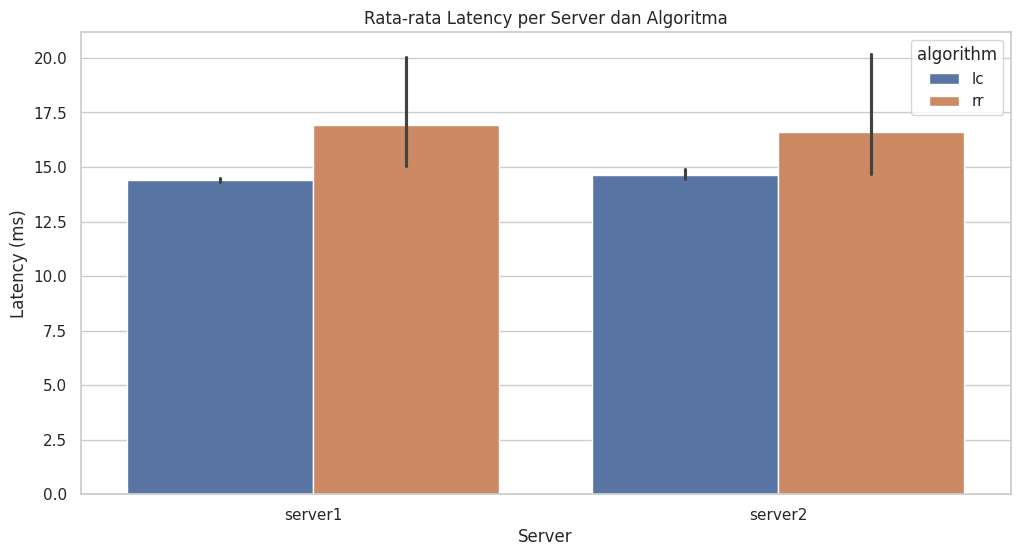

In [21]:
# 7. Visualisasi: Perbandingan latency
sns.barplot(data=mean_metrics, x='server', y='latency_ms', hue='algorithm')
plt.title('Rata-rata Latency per Server dan Algoritma')
plt.ylabel('Latency (ms)')
plt.xlabel('Server')
plt.show()

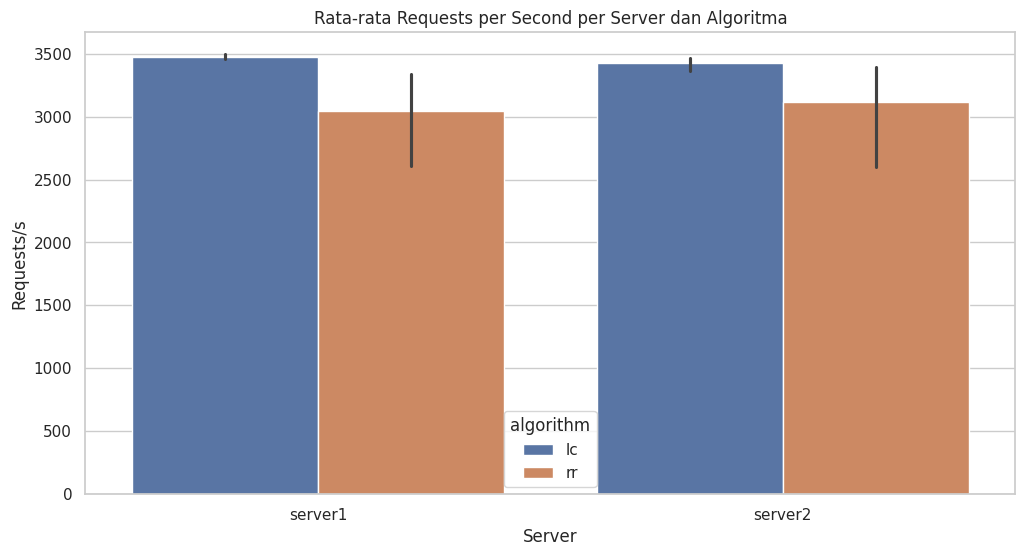

In [22]:
# 8. Visualisasi: Perbandingan requests per second
sns.barplot(data=mean_metrics, x='server', y='requests_per_second', hue='algorithm')
plt.title('Rata-rata Requests per Second per Server dan Algoritma')
plt.ylabel('Requests/s')
plt.xlabel('Server')
plt.show()

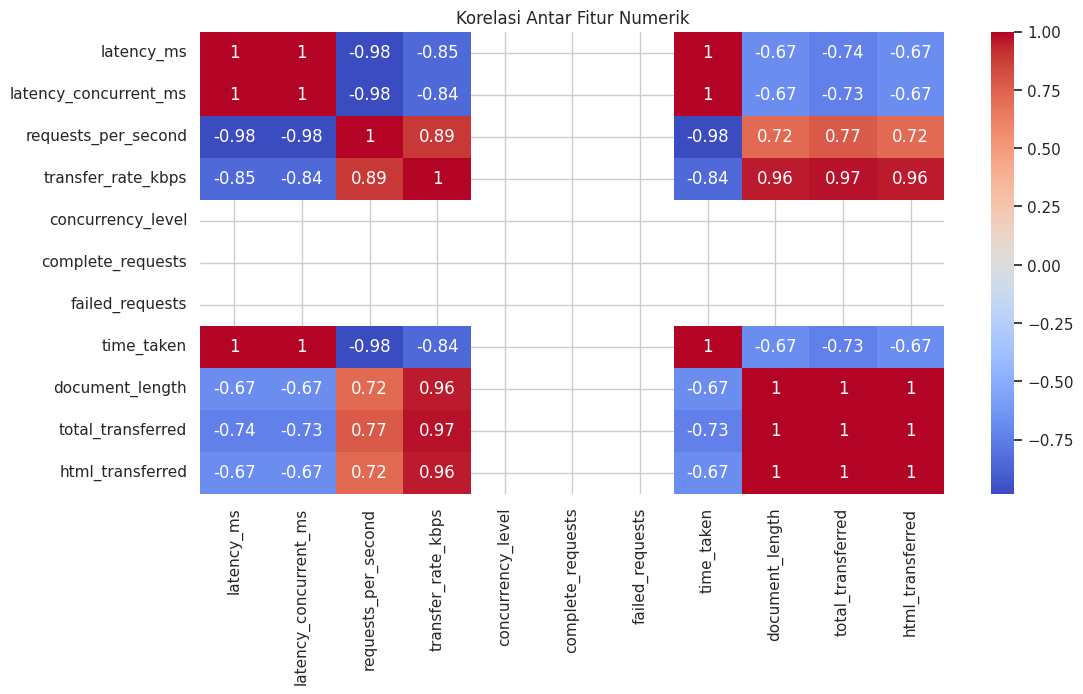

In [23]:
# 9. Heatmap korelasi antar metrik numerik
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

In [24]:
# 10. Throughput: Round-Robin vs Least Connection

# Hitung throughput rata-rata per skenario dan algoritma
throughput_df = df.groupby(['load', 'server', 'algorithm'])['requests_per_second'].mean().reset_index()
throughput_pivot = throughput_df.pivot_table(index=['load', 'server'], columns='algorithm', values='requests_per_second').reset_index()

# Hitung selisih persen
throughput_pivot['Selisih (%)'] = 100 * (throughput_pivot['lc'] - throughput_pivot['rr']) / throughput_pivot['rr']
throughput_pivot.columns.name = None
throughput_pivot.rename(columns={'server': 'Endpoint', 'load': 'Skenario', 'rr': 'Round-Robin', 'lc': 'Least Connection'}, inplace=True)
throughput_pivot

,Skenario,Endpoint,Least Connection,Round-Robin,Selisih (%)
0,Rendah,server1,3467.263333,2604.850000,33.107984
1,Rendah,server2,3365.380000,2595.866667,29.643793
2,Sedang,server1,3494.840000,3202.160000,9.140080
3,Sedang,server2,3462.706667,3349.616667,3.376207
4,Tinggi,server1,3454.993333,3334.343333,3.618404
5,Tinggi,server2,3442.396667,3410.483333,0.935742


In [25]:
# 11. Response Time: Round-Robin vs Least Connection

# Hitung response time rata-rata per skenario dan algoritma
latency_df = df.groupby(['load', 'server', 'algorithm'])['latency_ms'].mean().reset_index()
latency_pivot = latency_df.pivot_table(index=['load', 'server'], columns='algorithm', values='latency_ms').reset_index()

# Hitung selisih persen
latency_pivot['Selisih (%)'] = 100 * (latency_pivot['rr'] - latency_pivot['lc']) / latency_pivot['rr']
latency_pivot.columns.name = None
latency_pivot.rename(columns={'server': 'Endpoint', 'load': 'Skenario', 'rr': 'Round-Robin', 'lc': 'Least Connection'}, inplace=True)
latency_pivot

,Skenario,Endpoint,Least Connection,Round-Robin,Selisih (%)
0,Rendah,server1,14.426000,20.044000,28.028338
1,Rendah,server2,14.901000,20.169333,26.120513
2,Sedang,server1,14.310333,15.653333,8.579642
3,Sedang,server2,14.451667,14.944333,3.296679
4,Tinggi,server1,14.479333,15.048667,3.783281
5,Tinggi,server2,14.556667,14.675667,0.810866


In [27]:
# 13. Analisis Gabungan

def summary_analysis(load_level):
    sub = throughput_df[throughput_df['load'] == load_level]
    avg_throughput_rr = sub[sub['algorithm'] == 'rr']['requests_per_second'].mean()
    avg_throughput_lc = sub[sub['algorithm'] == 'lc']['requests_per_second'].mean()
    better = 'Least Connection' if avg_throughput_lc > avg_throughput_rr else 'Round-Robin'
    diff_pct = 100 * abs(avg_throughput_lc - avg_throughput_rr) / min(avg_throughput_lc, avg_throughput_rr)
    return f"Pada beban {load_level.lower()}, {better} memiliki throughput lebih baik dengan selisih {diff_pct:.2f}%."

print("Performa pada Beban Rendah:")
print(summary_analysis("Rendah"))
print("\nPerforma pada Beban Sedang:")
print(summary_analysis("Sedang"))
print("\nPerforma pada Beban Tinggi:")
print(summary_analysis("Tinggi"))

Performa pada Beban Rendah:
Pada beban rendah, Least Connection memiliki throughput lebih baik dengan selisih 31.38%.

Performa pada Beban Sedang:
Pada beban sedang, Least Connection memiliki throughput lebih baik dengan selisih 6.19%.

Performa pada Beban Tinggi:
Pada beban tinggi, Least Connection memiliki throughput lebih baik dengan selisih 2.26%.


In [28]:
# Distribusi beban endpoint
def endpoint_comparison():
    load_order = ['Rendah', 'Sedang', 'Tinggi']
    text = ""
    for level in load_order:
        subset = latency_df[latency_df['load'] == level]
        fastest = subset.groupby('server')['latency_ms'].mean().idxmin()
        text += f"- Pada beban {level.lower()}, endpoint tercepat adalah **{fastest}**.\n"
    return text

from IPython.display import Markdown
Markdown("**Endpoint Berat vs sedang vs Ringan:**\n" + endpoint_comparison())

**Endpoint Berat vs sedang vs Ringan:**
- Pada beban rendah, endpoint tercepat adalah **server1**.
- Pada beban sedang, endpoint tercepat adalah **server2**.
- Pada beban tinggi, endpoint tercepat adalah **server2**.
